<a href="https://colab.research.google.com/github/kylemcq13/Projects/blob/master/16_7_Feature_Engineering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import ttest_ind
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox

sns.set(style="whitegrid")

In [0]:
#upload the data from SQL
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine2)

engine2.dispose()

In [0]:
#have a looksy at the dataset
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

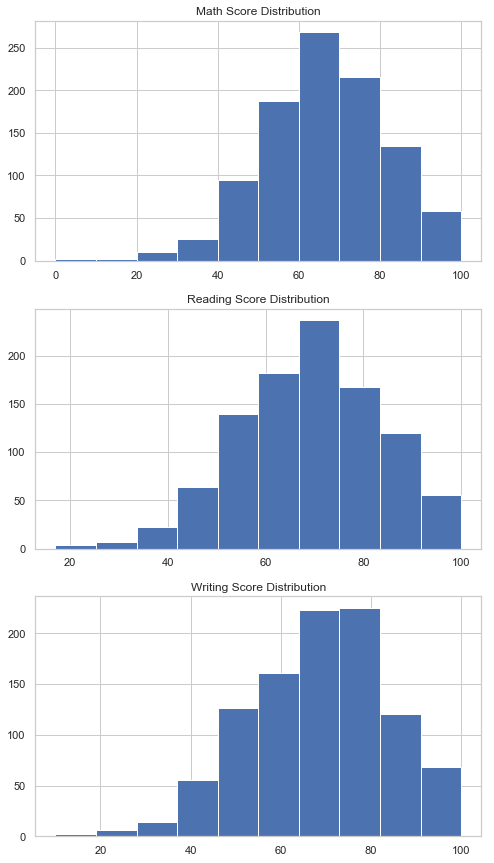

In [0]:
#plot the distributions of each exam score
plt.figure(figsize=(8,15))

plt.subplot(3,1,1)
plt.hist(student_df['math score'])
plt.title('Math Score Distribution')

plt.subplot(3,1,2)
plt.hist(student_df['reading score'])
plt.title('Reading Score Distribution')

plt.subplot(3,1,3)
plt.hist(student_df['writing score'])
plt.title('Writing Score Distribution')

plt.show()

In [0]:
#apply statistical testing to determine normality
jb_stats = jarque_bera(student_df["math score"])
norm_stats = normaltest(student_df["math score"])
print("Jarque-Bera test statistics for math score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for math score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["reading score"])
norm_stats = normaltest(student_df["reading score"])
print("Jarque-Bera test statistics for reading score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for reading score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["writing score"])
norm_stats = normaltest(student_df["writing score"])
print("Jarque-Bera test statistics for writing score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for writing socre is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))



Jarque-Bera test statistics for math score is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics for math score is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics for reading score is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics for reading score is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics for writing score is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics for writing socre is 13.606450837263859 and p value is 0.0011101885439899974


The data doesn't appear to be normal. Let's apply a Box Cox transformation.

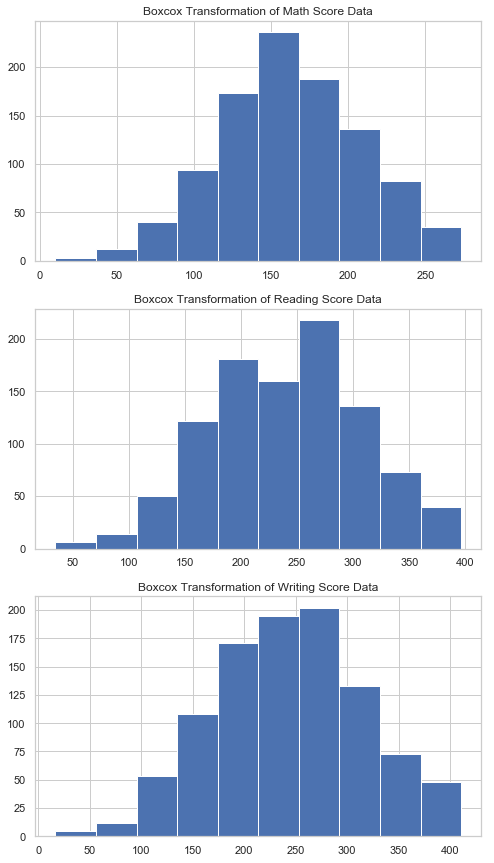

In [0]:
#box cox transformation plotting
math_score_boxcox,_ = boxcox(student_df[student_df["math score"] > 0]["math score"])
reading_score_boxcox,_ = boxcox(student_df["reading score"])
writing_score_boxcox,_ = boxcox(student_df["writing score"])

plt.figure(figsize=(8,15))

plt.subplot(3,1,1)
plt.hist(math_score_boxcox)
plt.title('Boxcox Transformation of Math Score Data')

plt.subplot(3,1,2)
plt.hist(reading_score_boxcox)
plt.title('Boxcox Transformation of Reading Score Data')

plt.subplot(3,1,3)
plt.hist(writing_score_boxcox)
plt.title('Boxcox Transformation of Writing Score Data')


plt.show()

In [0]:
#apply statistical testing to determine normality
jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)
print("Jarque-Bera test statistics for box cox math score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for box cox math score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)
print("Jarque-Bera test statistics for box cox reading score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for box cox reading score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)
print("Jarque-Bera test statistics for box cox writing score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for box cox writing score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics for box cox math score is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics for box cox math score is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics for box cox reading score is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics for box cox reading score is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics for box cox writing score is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics for box cox writing score is 6.267311355043339 and p value is 0.04355827085023795


After the box cox transformation we can say that data distributions become more normal in shape. This is confirmed by the statistic testing when compared to the non transformed data above. 

# 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

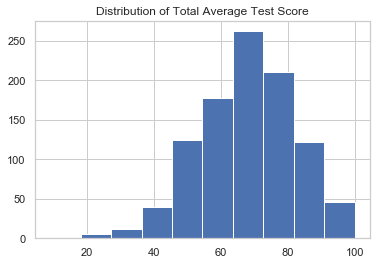

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [0]:
#single variable - all test scores averaged to one value
#graph the distribution

test_score = (student_df['math score'] + student_df['reading score'] + student_df['writing score'])/3

plt.hist(test_score)
plt.title('Distribution of Total Average Test Score')
plt.show()

jb_stats = jarque_bera(test_score)
norm_stats = normaltest(test_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

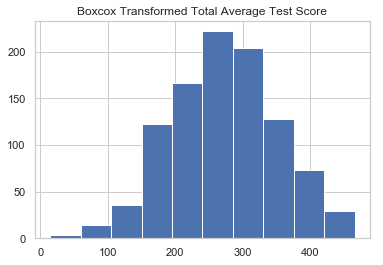

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177


In [0]:
#apply boxcox transformation
#graph the transformation

test_score_boxcox,_ = boxcox(test_score)

plt.hist(test_score_boxcox)
plt.title('Boxcox Transformed Total Average Test Score')
plt.show()

jb_stats = jarque_bera(test_score_boxcox)
norm_stats = normaltest(test_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

As can be seen by our histograms and stats data, the data becomes more normalized after box cox transformation.

# 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [0]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


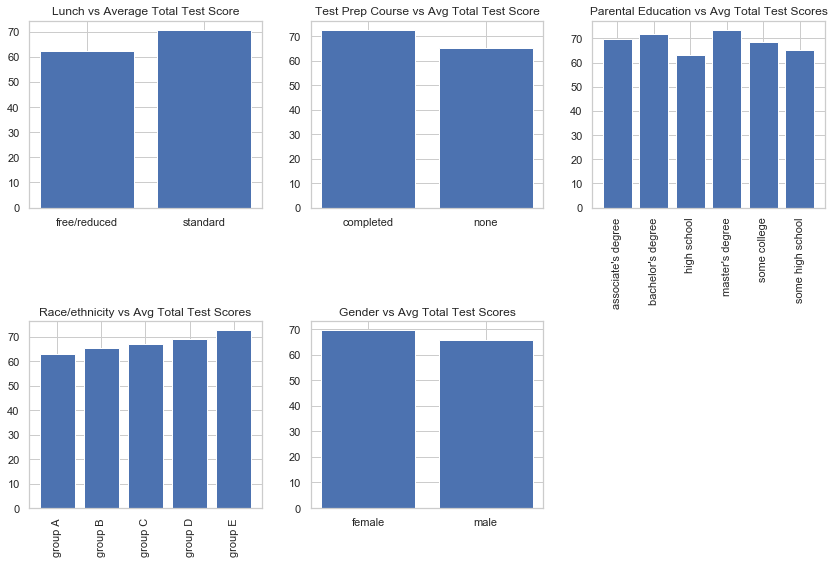

In [0]:
#plot each variable (gender, race, parental edu, lunch, test prep) vs total average test score

student_df['test_score'] = test_score

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.bar(student_df.groupby('lunch')['test_score'].mean().index, student_df.groupby('lunch')['test_score'].mean())
plt.title('Lunch vs Average Total Test Score')

plt.subplot(2,3,2)
plt.bar(student_df.groupby('test preparation course')['test_score'].mean().index, student_df.groupby('test preparation course')['test_score'].mean())
plt.title('Test Prep Course vs Avg Total Test Score')

plt.subplot(2,3,3)
plt.bar(student_df.groupby('parental level of education')['test_score'].mean().index, student_df.groupby('parental level of education')['test_score'].mean())
plt.xticks(rotation='vertical')
plt.title('Parental Education vs Avg Total Test Scores')

plt.subplot(2,3,4)
plt.bar(student_df.groupby('race/ethnicity')['test_score'].mean().index, student_df.groupby('race/ethnicity')['test_score'].mean())
plt.xticks(rotation='vertical')
plt.title('Race/ethnicity vs Avg Total Test Scores')

plt.subplot(2,3,5)
plt.bar(student_df.groupby('gender')['test_score'].mean().index, student_df.groupby('gender')['test_score'].mean())
plt.title('Gender vs Avg Total Test Scores')

plt.tight_layout()
plt.show()

All variables seem to be able to tell a story about success in exam performance.

 1. There is a noticeable change from free/reduced lunch to standard lunch when comparing to total average test scores. Is this truly due to the lunch or something else?
 2. Taking the test prep course seems to have a strong effect on exam performance, which would stand to reason.
 3. There is variance in parental level of education when it comes to student exam scores, and it is what we would expect other than the high school education is slightly lower than the some high school education variable.
 4. Race/ethnicity has an effect as the scores increase from Groups A to E.
 5. Females seem to do better overall on exams than males do. 
 
 